# Predict Housing Value of King County Independent Project

## Author - Xinyue Yang

# Abstract

In this milstone project, I used King County House Sales Prices data, which includes houses solde between May 2014 to May 2015. The goal is to predict the house sales price for the next 12-month window. 

## Problem

I am interested in predicting the house sales price using regression models; therefore, it is important to understand what features are most correlated to house prices and what are the relationships through data exploration. 


In [1]:
# Load necessary libraries
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
from scipy.stats import shapiro
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats  
import scipy

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [2]:
# Location of dataset
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/kc_house_data.csv"

In [3]:
# Pull data into a dataset
house = pd.read_csv(fileName)
#check data type and overview the dataset 
print(house.shape)
print(house.dtypes)
print(house.head())
# Looking for nulls
print(house.isnull().any())
# Summary Statistics 
house.describe()

(21613, 21)
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object
           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


The dataset is not big and contains 20 features without any null value. We don't need to treat the data since it is fairly clean.  

## Exploratory Data Analysis

Text(0.5, 0.98, 'Histograms of Numeric Variables')

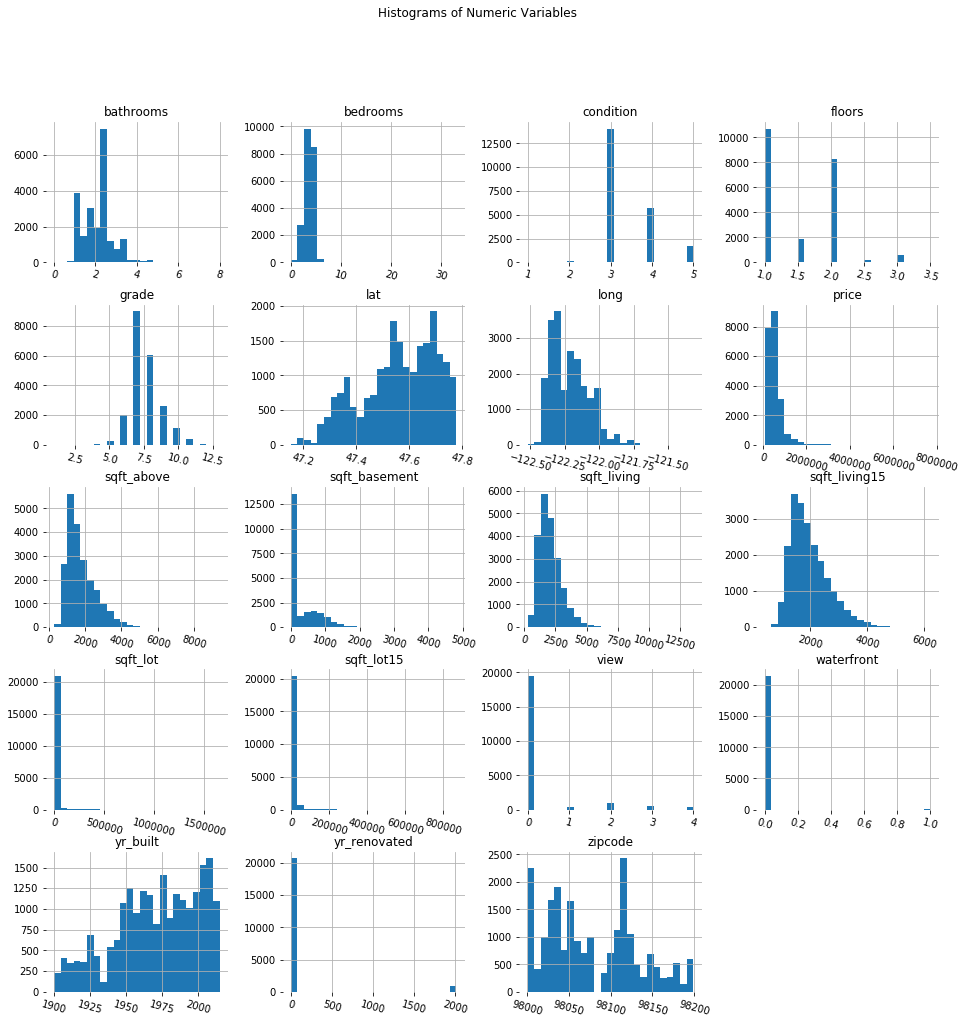

In [4]:
df1=house[['price', 'bedrooms', 'bathrooms', 'sqft_living',
    'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
    'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
    'lat', 'long', 'sqft_living15', 'sqft_lot15']]
h = df1.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()]
[x.yaxis.tick_left() for x in h.ravel()]
plt.suptitle("Histograms of Numeric Variables")

Histograms of the variable help me to understand the distribution and to check if any variable contain outliners that need to be treated before modeling/visualization. 

In [5]:
# Summary Statistics of Dependant Variable: Price
print(house['price'].describe())
print(house['price'].median())

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64
450000.0


Text(0.5, 1.0, 'Counts by Condition')

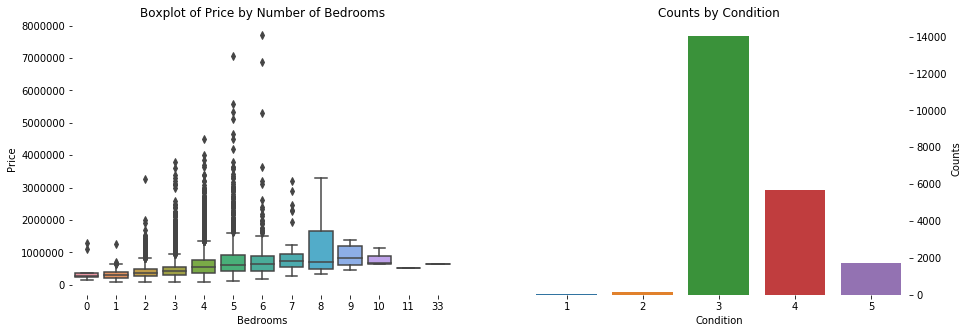

In [6]:
#Relationship between Price and Number of Bedrooms/Condition
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=house['bedrooms'],y=house['price'], ax=axes[0])
sns.countplot(x=house['condition'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Bedrooms', ylabel='Price')
axes[0].yaxis.tick_left()
axes[0].set_title('Boxplot of Price by Number of Bedrooms')

axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Condition', ylabel='Counts')
axes[1].set_title('Counts by Condition')

The boxplot of Price by Number of Bedrooms shows the price range of 6-bedroom house is the greatest and there are some outliers like 33 bedrooms houses in the dataset.   

The 'counts by condition' bar chart indicates that houses with condition 3 are the most common ones in the market, following by houses with condition 4 and 5. 

Text(0.5, 1.0, 'Boxplot of Price by Grade')

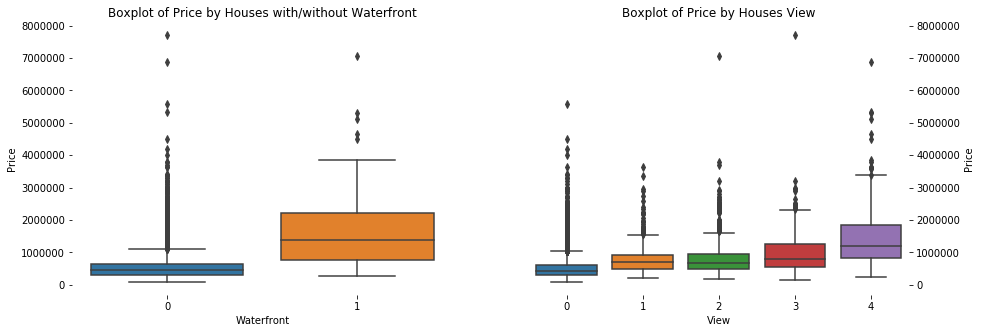

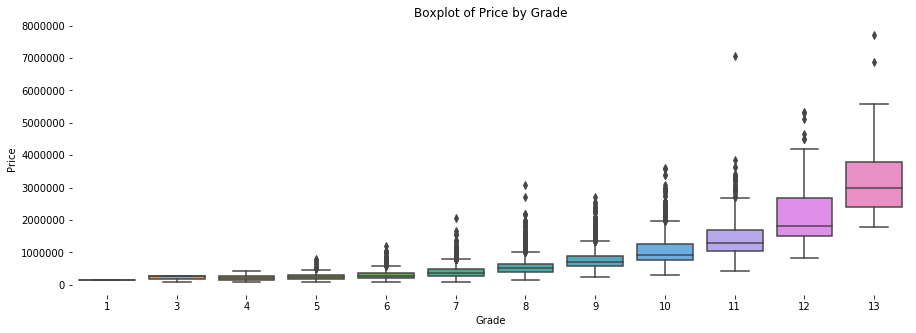

In [7]:
#Relationship between Price and waterfront/view/grade
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=house['waterfront'],y=house['price'], ax=axes[0])
sns.boxplot(x=house['view'],y=house['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Waterfront', ylabel='Price')
axes[0].yaxis.tick_left()
axes[0].set_title('Boxplot of Price by Houses with/without Waterfront')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='View', ylabel='Price')
axes[1].set_title('Boxplot of Price by Houses View')

f, axe = plt.subplots(1, 1,figsize=(15,5))
sns.boxplot(x=house['grade'],y=house['price'], ax=axe)
sns.despine(left=True, bottom=True)
axe.yaxis.tick_left()
axe.set(xlabel='Grade', ylabel='Price')
axe.set_title('Boxplot of Price by Grade')

The 'boxplot of Price by Houses with/without Waterfront' shows that houses by waterfront have higher house price compared to houses not by waterfront.  
In 'boxplot of price by grade', houses with grade of 10 and above show the price is significantly higher than the other houses with lower grade.  

Text(0.5, 21.706249999999983, 'Living space (in sqft)')

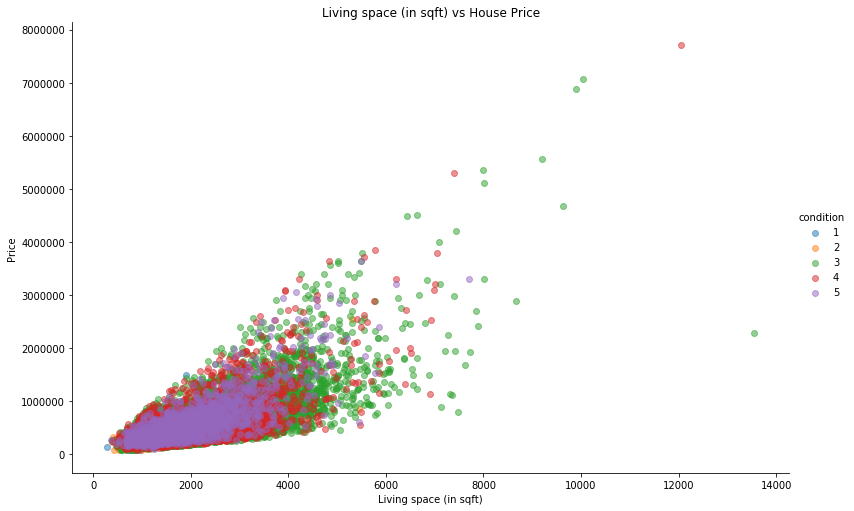

In [8]:
#Relationship between Price and living space size by house condition
sns.lmplot(data=house,x = 'sqft_living', y = 'price',hue='condition',
           fit_reg = False,height=7,aspect=1.6,
          scatter_kws={'alpha':0.5})
plt.title('Living space (in sqft) vs House Price') # Give the plot a main title
plt.ylabel('Price')# Set text for y axis
plt.xlabel('Living space (in sqft)')

According to the scatter plot above, condition 3 has the widest range of living space and price. Living space size is positively correlated to house price. 

Text(0.5, 21.706249999999983, 'Living space (in sqft)')

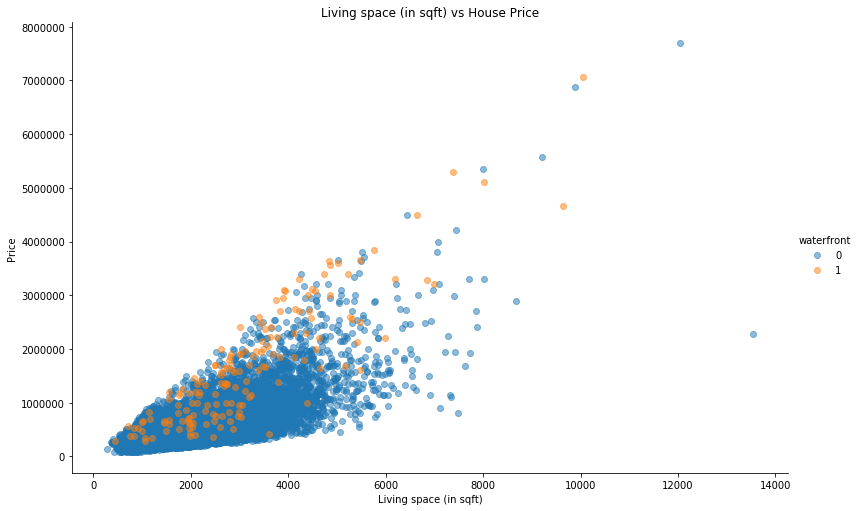

In [9]:
#Relationship between Price and living space size by waterfront
sns.lmplot(data=house,x = 'sqft_living', y = 'price',hue='waterfront',
           fit_reg = False,height=7,aspect=1.6,
          scatter_kws={'alpha':0.5})
plt.title('Living space (in sqft) vs House Price') # Give the plot a main title
plt.ylabel('Price')# Set text for y axis
plt.xlabel('Living space (in sqft)')

According to the the scatter plot above, houses not by waterfront have higher quantity in the dataset and most house size is below 5000 sqft. Although, houses by waterfront are relatively rare in this dataset, but it has greater ranges of price and size.  

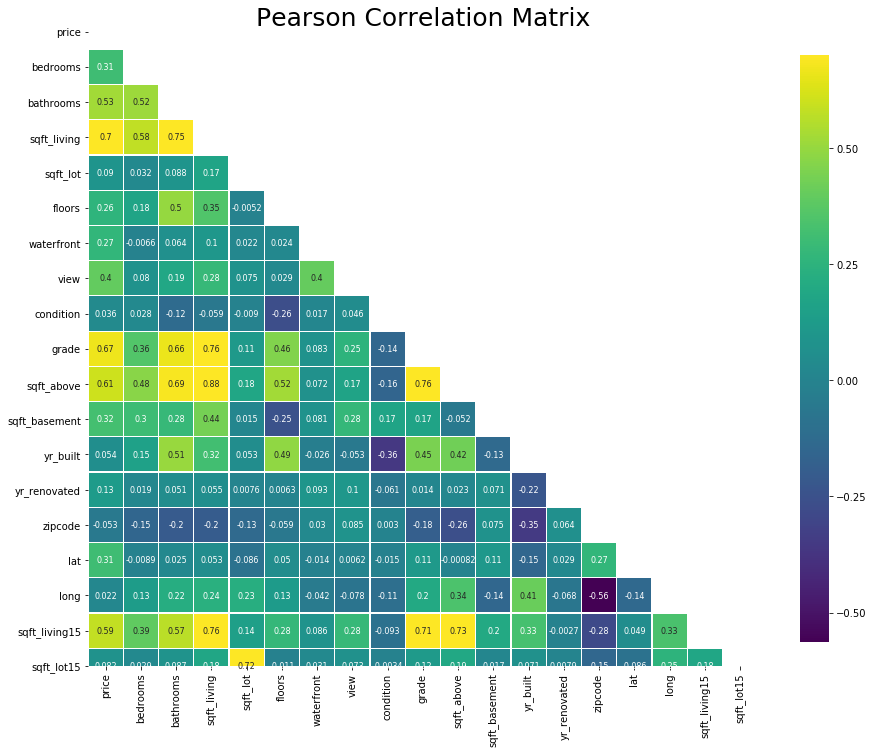

In [10]:
#Correlation Matrix
features = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']
mask = np.zeros_like(house[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(15, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(house[features].corr(),linewidths=0.2,vmax=0.7,square=True,cmap="viridis", 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

## Comments:

Overall, through the data exploration and visualization analysis, I found variables: sqft_living, waterfront, condition and grade have strong relationships with the independant variable house sales price. The pearson correlation table also indicates that variables: number of bathrooms and sqft_living15 also have strong correlation to house price. Those would be the main features in my regression models for predicting the house price in King County. 


## Identify a likely distribution for price, sqft_living and sqft_lot

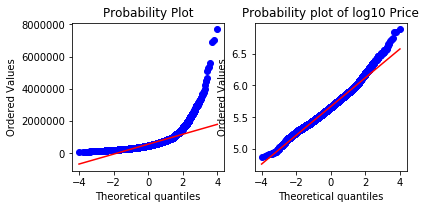

In [11]:
#variable: Price
house['log10_price'] = np.log10(house['price'])

#Visual Normality Checks
## QQ plot 

def qq_plot(vec1, vec2):
    import matplotlib.pyplot as plt
    import scipy.stats as ss
    plt.figure(figsize=(6, 6)).gca() # define axis
    
    ax1 = plt.subplot(221) ## setup the left subplot
    ax1.set_title('Probability plot of Price')
    ss.probplot(vec1, plot = ax1) ## Plot the left subplot
    ax2 = plt.subplot(222) ## Set up the right subplot
    ss.probplot(vec2, plot = ax2) ## Plot the right subplot
    ax2.set_title('Probability plot of log10 Price')
    
qq_plot(house['price'], house['log10_price']) 

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


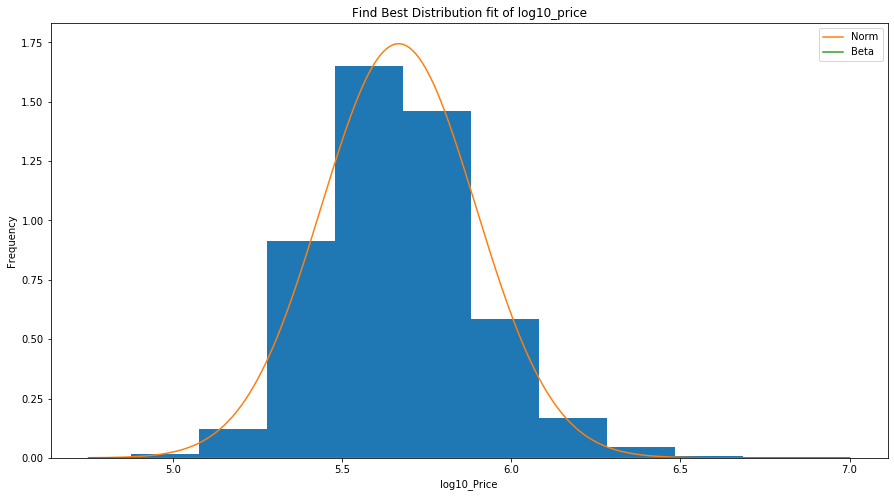

In [13]:
# plot normed histogram
plt.figure(figsize=(15,8))
plt.hist(house['log10_price'], normed=True)
 
# find minimum and maximum of xticks, so we know
# where we should compute theoretical distribution
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(house['log10_price']))

# try the normal distribution first
m, s = stats.norm.fit(house['log10_price']) # get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, label="Norm") # plot it

# exactly same as above
#ag,bg,cg = stats.gamma.fit(house['log10_price'])  
#pdf_gamma = stats.gamma.pdf(house['log10_price'], ag, bg,cg)  
#plt.plot(lnspc, pdf_gamma, label="Gamma")

#beta fit 
ab,bb,cb,db = stats.beta.fit(house['log10_price'])  
pdf_beta = stats.beta.pdf(lnspc, ab, bb,cb, db)  
plt.plot(lnspc, pdf_beta, label="Beta")

  
plt.title('Find Best Distribution fit of log10_price') 
plt.legend(loc='upper right')
plt.xlabel('log10_Price')
plt.ylabel('Frequency')
plt.show()

Based on the QQ plot and histogram, log10_price is normally distributed. 

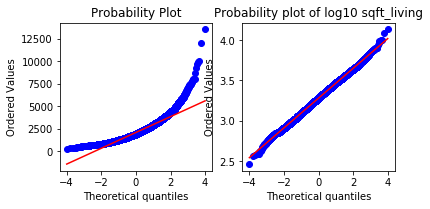

In [14]:
#Variable: sqft_living

house['log10_sqft_living'] = np.log10(house['sqft_living'])

#Visual Normality Checks
## QQ plot 

def qq_plot(vec1, vec2):
    import matplotlib.pyplot as plt
    import scipy.stats as ss
    plt.figure(figsize=(6, 6)).gca() # define axis
    
    ax1 = plt.subplot(221) ## setup the left subplot
    ax1.set_title('Probability plot of sqft_living')
    ss.probplot(vec1, plot = ax1) ## Plot the left subplot
    ax2 = plt.subplot(222) ## Set up the right subplot
    ss.probplot(vec2, plot = ax2) ## Plot the right subplot
    ax2.set_title('Probability plot of log10 sqft_living')
    
qq_plot(house['sqft_living'], house['log10_sqft_living']) 

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


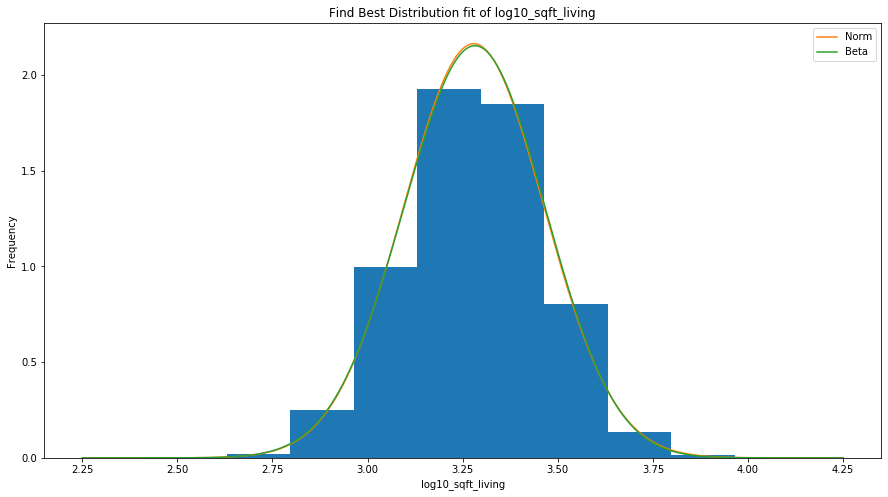

In [16]:
# plot normed histogram
plt.figure(figsize=(15,8))
plt.hist(house['log10_sqft_living'], normed=True)
 
# find minimum and maximum of xticks, so we know
# where we should compute theoretical distribution
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(house['log10_sqft_living']))

# try the normal distribution first
m, s = stats.norm.fit(house['log10_sqft_living']) # get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, label="Norm") # plot it


#beta fit 
ab,bb,cb,db = stats.beta.fit(house['log10_sqft_living'])  
pdf_beta = stats.beta.pdf(lnspc, ab, bb,cb, db)  
plt.plot(lnspc, pdf_beta, label="Beta")

  
plt.title('Find Best Distribution fit of log10_sqft_living') 
plt.legend(loc='upper right')
plt.xlabel('log10_sqft_living')
plt.ylabel('Frequency')
plt.show()

log10_sqft_living is also normally distributed.

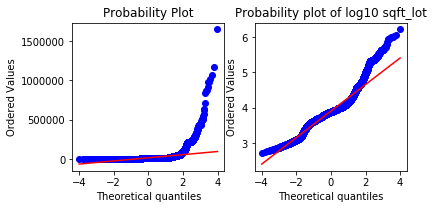

In [17]:
#Variable: sqft_lot
house['log10_sqft_lot'] = np.log10(house['sqft_lot'])

#Visual Normality Checks
## QQ plot 

def qq_plot(vec1, vec2):
    import matplotlib.pyplot as plt
    import scipy.stats as ss
    plt.figure(figsize=(6, 6)).gca() # define axis
    
    ax1 = plt.subplot(221) ## setup the left subplot
    ax1.set_title('Probability plot of sqft_lot')
    ss.probplot(vec1, plot = ax1) ## Plot the left subplot
    ax2 = plt.subplot(222) ## Set up the right subplot
    ss.probplot(vec2, plot = ax2) ## Plot the right subplot
    ax2.set_title('Probability plot of log10 sqft_lot')
    
qq_plot(house['sqft_lot'], house['log10_sqft_lot']) 

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


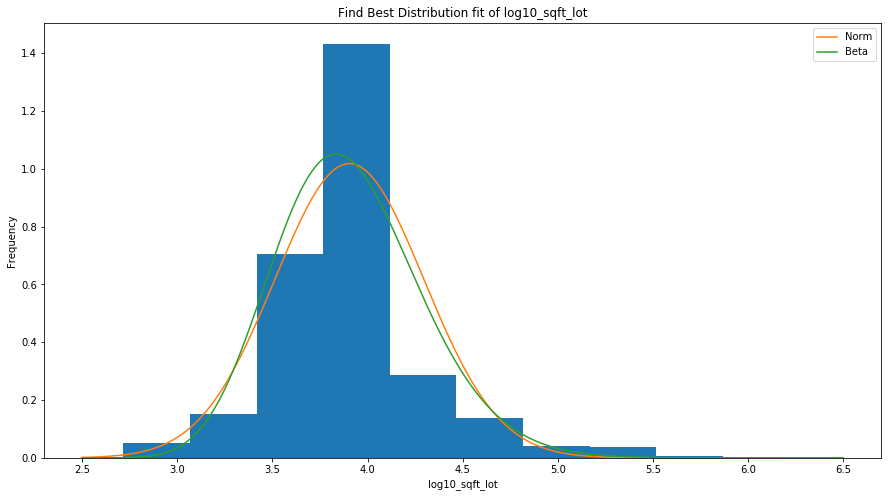

In [18]:
# plot normed histogram
plt.figure(figsize=(15,8))
plt.hist(house['log10_sqft_lot'], normed=True)
 
# find minimum and maximum of xticks, so we know
# where we should compute theoretical distribution
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(house['log10_sqft_lot']))

# try the normal distribution first
m, s = stats.norm.fit(house['log10_sqft_lot']) # get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, label="Norm") # plot it


#beta fit 
ab,bb,cb,db = stats.beta.fit(house['log10_sqft_lot'])  
pdf_beta = stats.beta.pdf(lnspc, ab, bb,cb, db)  
plt.plot(lnspc, pdf_beta, label="Beta")

  
plt.title('Find Best Distribution fit of log10_sqft_lot') 
plt.legend(loc='upper right')
plt.xlabel('log10_sqft_lot')
plt.ylabel('Frequency')
plt.show()

based on the qq plot and histgram plot, log10_sqft_lot is close to normal distribution. 

## Compute basic summary statistics and confidence intervals for variable log10_price by both classical, bootstrap, and Bayesian methods

## Classical Method

In [19]:
#classical

#compute summary statistics
price_mean = house['log10_price'].mean()
price_std = house['log10_price'].std()

print('the mean of variable log10_price is %.3f' % ( price_mean))
print('the std of variable log10_price is %.3f' % ( price_std))

the mean of variable log10_price is 5.667
the std of variable log10_price is 0.229


In [20]:
#Compute confidence intervals
alpha = 0.95
half_width = scipy.stats.norm.ppf((1 + alpha)/2, loc=price_mean, scale=price_std) - price_mean
print('The half width is %.2f' % half_width)

ci_low = price_mean - half_width
ci_high = price_mean + half_width

print('The mean of variable log10_price is %.2f' % price_mean)
print('The %.2f level CI is (%.2f , %.2f)' % (alpha, ci_low, ci_high))

The half width is 0.45
The mean of variable log10_price is 5.67
The 0.95 level CI is (5.22 , 6.11)


## Bootstrap

Text(0, 0.5, 'Frequency')

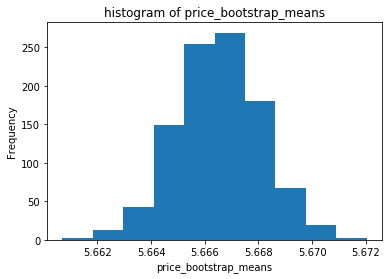

In [21]:
# Bootstrap the mean and std
n_replicas = 1000

price_bootstrap_means = pd.Series([
    house['log10_price'].sample(frac=1, replace=True).mean()
    for i in range(n_replicas)])

price_bootstrap_std = pd.Series([
    house['log10_price'].sample(frac=1, replace=True).std()
    for i in range(n_replicas)])


plt.hist(price_bootstrap_means)
plt.title('histogram of price_bootstrap_means')
plt.xlabel('price_bootstrap_means')
plt.ylabel('Frequency')

In [22]:
# compute 95% CI for bootstrap mean

ci_low =  price_bootstrap_means.mean()- 1.96 * price_bootstrap_means.std()

ci_high = price_bootstrap_means.mean() + 1.96 * price_bootstrap_means.std()

ci_low
ci_high

print('The .95 level CI of bootstrap mean is (%.2f , %.2f)' % ( ci_low, ci_high))

The .95 level CI of bootstrap mean is (5.66 , 5.67)


## Bayesian methods

Mean = 5.667, Standard deviation = 0.229


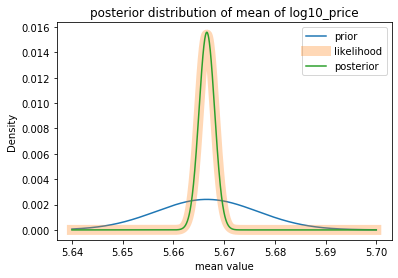

In [23]:
#compute mean and std
def posterior(prior, like):
    post = prior * like # compute the product of the probabilities
    return post / sum(post) # normalize the distribution to sum to unity

N = 1000
p = np.linspace(5.64, 5.7, num=N)

pp = scipy.stats.norm.pdf(p, loc=house['log10_price'].mean(), scale=0.01)
pp = pp / pp.sum() # normalize

def comp_like(p, x): 
    variance = np.std(x)**2 # sigmasqr
    x_mean = np.asarray(x).mean()  # xbar
    print('Mean = %.3f, Standard deviation = %.3f' % (x_mean, np.std(x)))
    n = len(x)
    l = np.exp(-n * np.square(x_mean - p) / (2 * variance))
    return l / l.sum()

like_price = comp_like(p, house['log10_price'])
post_price = posterior(pp, like_price)

plt.title('posterior distribution of mean of log10_price')
plt.plot(p, pp, label='prior')
plt.plot(p, like_price, label='likelihood', alpha=.3, linewidth=10)
plt.plot(p, post_price, label='posterior')
plt.xlabel('mean value')
plt.ylabel('Density')
plt.legend()

The 0.95 credible interval of mean of log10_price is 5.66 to 5.67


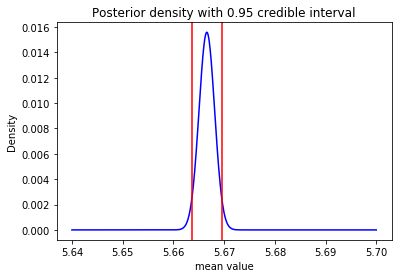

In [24]:
#compute CI at 95% level
def plot_ci(p, post, num_samples, lower_q, upper_q):
    ## This function computes a credible interval using an assumption
    ## of symetry in the bulk of the distribution to keep the 
    ## calculation simple. 
    ## Compute a large sample by resampling with replacement
    samples = np.random.choice(p, size=num_samples, replace=True, p=post)
    ci = scipy.percentile(samples, [lower_q*100, upper_q*100]) # compute the quantiles
    
    interval = upper_q - lower_q
    plt.title('Posterior density with %.2f credible interval' % interval)
    plt.plot(p, post, color='blue')
    plt.xlabel('mean value')
    plt.ylabel('Density')
    plt.axvline(x=ci[0], color='red')
    plt.axvline(x=ci[1], color='red')
    print('The %.2f credible interval of mean of log10_price is %.2f to %.2f' 
          % (interval, ci[0],ci[1]))
  
    
num_samples = 100000
plot_ci(p, post_price, num_samples, lower_q=.025, upper_q=.975)

## Leverage confidence intervals in performing hypothesis tests to determine if the differences in pairs and multiple populations are significant.

## Test log10_price by variable waterfront

In [25]:
def t_test(a, b, alpha, alternative='two-sided'):
    from scipy import stats
    import scipy.stats as ss
    import pandas as pd
    import statsmodels.stats.weightstats as ws
    
    diff = a.mean() - b.mean()

    res = ss.ttest_ind(a, b, equal_var=False)
      
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, alternative=alternative, usevar='unequal') 
    degfree = means.dof_satt()

    index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']
    return pd.Series([degfree, diff, res[0], res[1], confint[0], confint[1]], index = index)  


#Test significance of or log10_price stratified by waterfront
house['waterfront'].value_counts()
waterfront = house.loc[house.loc[:, 'waterfront'] == 1, 'log10_price']
nowaterfront = house.loc[house.loc[:, 'waterfront'] == 0, 'log10_price']

test_waterfront = t_test(waterfront, nowaterfront, alpha = 0.05)
print(test_waterfront)


DegFreedom    1.633993e+02
Difference    4.615752e-01
Statistic     1.971788e+01
PValue        4.608590e-45
Low95CI       4.153521e-01
High95CI      5.077983e-01
dtype: float64


## Comments: 
The p-value is smaller than 0.05. Therefore,we reject the null hypothesis. The mean price of house with waterfront is different from the mean price of house without waterfront.

## Tukey’s Honest Significant Differences (HSD)
## log10_price by condition

In [26]:
#Turkey HSD
house['condition'] = house['condition'].astype(object)
df = house[['condition','log10_price']]

from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

# Set up the data for comparison (creates a specialised object)
MultiComp = MultiComparison(df['log10_price'],
                            df['condition'])

# Show all pair-wise comparisons:

# Print the comparisons

print(MultiComp.tukeyhsd().summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     1      2   0.0204   0.9 -0.1022   0.143  False
     1      3   0.2455 0.001  0.1322  0.3587   True
     1      4   0.2262 0.001  0.1127  0.3396   True
     1      5   0.2897 0.001  0.1756  0.4038   True
     2      3   0.2251 0.001  0.1775  0.2726   True
     2      4   0.2058 0.001  0.1578  0.2538   True
     2      5   0.2693 0.001  0.2197  0.3189   True
     3      4  -0.0193 0.001  -0.029 -0.0095   True
     3      5   0.0442 0.001  0.0283  0.0601   True
     4      5   0.0635 0.001  0.0464  0.0806   True
---------------------------------------------------


Based on the Turkey HSD test results, the price of houses in condition 2 has no difference with price of houses in condition 1, but condition 1,3-5 are very different in prices.

## Bootstrap Method: compare difference in means of the price of houses with grade below 10 and the price of houses with grade above 10

In [28]:
house['grade_10']=(house['grade'] > 9).astype(int).astype(object)
house['grade_10'].value_counts()

0    19977
1     1636
Name: grade_10, dtype: int64

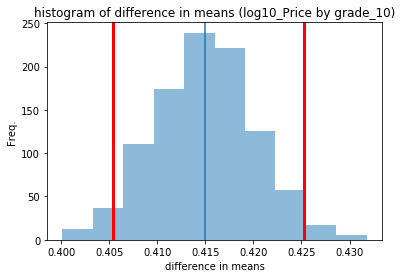

In [29]:
diffs = []
for i in range(n_replicas):
    sample = house.sample(frac=1.0, replace=True)
    grade_GT10_sample_mean = sample[sample.grade_10 == 1].log10_price.mean()
    grade_LT10_sample_mean = sample[sample.grade_10 == 0].log10_price.mean()
    diffs.append(grade_GT10_sample_mean - grade_LT10_sample_mean)
diffs = pd.Series(diffs)

def plot_hist(x, p=5):
    # Plot the distribution and mark the mean
    plt.hist(x, alpha=.5)
    plt.axvline(x.mean())
    # 95% confidence interval    
    plt.axvline(np.percentile(x, p/2.), color='red', linewidth=3)
    plt.axvline(np.percentile(x, 100-p/2.), color='red', linewidth=3)
    plt.title('histogram of difference in means (log10_Price by grade_10)')
    plt.ylabel('Freq.')
    plt.xlabel('difference in means')
plot_hist(diffs)

## Comment:
The distribution of the difference in means is far from zero. We can infer that the means of the two populations are significantly different.

## Data Prep for Modeling

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


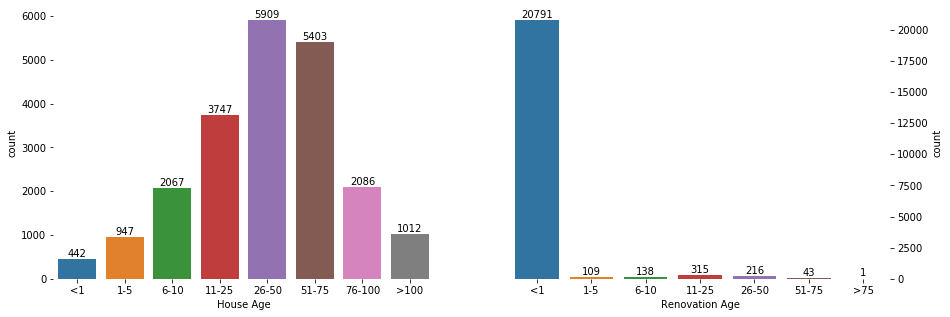

In [30]:
# create a house_age amd  variable 
#  take the year from the date column
house['sales_yr']=house['date'].astype(str).str[:4]
# add the age of the buildings when the houses were sold as a new column
house['house_age']=house['sales_yr'].astype(int)-house['yr_built']
# add the age of the renovation when the houses were sold as a new column
house['age_rnv']=0
house['age_rnv']=house['sales_yr'][house['yr_renovated']!=0].astype(int)-house['yr_renovated'][house['yr_renovated']!=0]
house['age_rnv'][house['age_rnv'].isnull()]=0

# partition the age into bins
bins = [-2,0,5,10,25,50,75,100,100000]
labels = ['<1','1-5','6-10','11-25','26-50','51-75','76-100','>100']
house['age_binned'] = pd.cut(house['house_age'], bins=bins, labels=labels)

# partition the age_rnv into bins
bins = [-2,0,5,10,25,50,75,100000]
labels = ['<1','1-5','6-10','11-25','26-50','51-75','>75']
house['age_rnv_binned'] = pd.cut(house['age_rnv'], bins=bins, labels=labels)

# histograms for the binned columns
f, axes = plt.subplots(1, 2,figsize=(15,5))
p1=sns.countplot(house['age_binned'],ax=axes[0])
for p in p1.patches:
    height = p.get_height()
    p1.text(p.get_x()+p.get_width()/2,height + 50,height,ha="center")   
p2=sns.countplot(house['age_rnv_binned'],ax=axes[1])
sns.despine(left=True, bottom=True)
for p in p2.patches:
    height = p.get_height()
    p2.text(p.get_x()+p.get_width()/2,height + 200,height,ha="center")
    
axes[0].set(xlabel='House Age')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Renovation Age');

# transform the factor values to be able to use in the model
house = pd.get_dummies(house, columns=['age_binned','age_rnv_binned'])

## Fit a regression model 

In [31]:
#print(house.isnull().any())
house['grade_10']=house['grade_10'].astype(int)

def scale(col):
    mean_col = np.mean(col)
    sd_col = np.std(col)
    std = (col - mean_col) / sd_col
    return std
house['scaled_sqft_base'] = scale(house['sqft_basement'])

# Summary Statistics 
house.dtypes

id                        int64
date                     object
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                object
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
log10_price             float64
log10_sqft_living       float64
log10_sqft_lot          float64
grade_10                  int64
sales_yr                 object
house_age                 int64
age_rnv                 float64
age_binned_<1             uint8
age_binned_1-5            uint8
age_binned_6-10           uint8
age_binn

In [33]:
# Split dataset into train and test datasets
train_house,test_house = train_test_split(house,train_size = 0.8,random_state=3)

In [32]:
evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '5-Fold Cross Validation':[]})
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

## Model 1 Linear Regression 

## 1.Linear regression, fit the whole dataset

Intercept, Slopes : 
Intercept           -27.417917
bathrooms             0.045043
log10_sqft_living     0.625721
waterfront            0.290462
grade_10              0.154449
house_age             0.001132
lat                   0.649170
dtype: float64
Intercept t-value, Slope t-values: 
Intercept            -90.888323
bathrooms             23.852213
log10_sqft_living     83.968350
waterfront            28.961287
grade_10              41.881491
house_age             32.584149
lat                  102.387268
dtype: float64

Hypothesis test summary for each coefficient if they differ from zero:
Intercept             0.000000e+00
bathrooms            3.860701e-124
log10_sqft_living     0.000000e+00
waterfront           5.762941e-181
grade_10              0.000000e+00
house_age            2.155677e-227
lat                   0.000000e+00
dtype: float64
                            OLS Regression Results                            
Dep. Variable:            log10_price   R-squared:           

Text(0.5, 1.0, 'Residual Histogram')

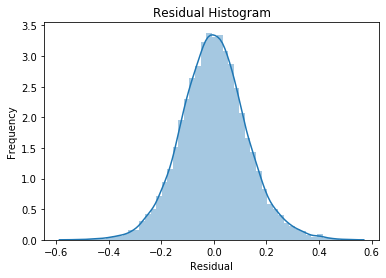

In [39]:
#age_binned_<1 + age_binned_1-5 +age_binned_6-10 + age_binned_11-25 + age_binned_26-50 + age_binned_51-75 + age_binned_76-100 + age_binned_>100 


import statsmodels.formula.api as sfm
ols_model = sfm.ols(formula = 'log10_price ~ bathrooms+log10_sqft_living + waterfront + grade_10  + house_age+ lat ', data=house)
#ols_model = sfm.ols(formula = 'log10_price ~ bathrooms+log10_sqft_living + waterfront + grade_10  + age_binned_<1 + age_binned_1-5 +age_binned_6-10 + age_binned_11-25 + age_binned_26-50 + age_binned_51-75 + age_binned_76-100 + age_binned_>100  ', data=house)
#ols_model = sfm.ols(formula = 'log10_price ~ bathrooms+log10_sqft_living + waterfront + grade_10 +  age_rnv +lat', data=house)

results = ols_model.fit()

# Get slope (m) and y-intercept (b)
print('Intercept, Slopes : \n{}'.format(results.params))

# Get the t-values (hypothesis test statistics) for linear regression coefficient hypothesis tests.
print('Intercept t-value, Slope t-values: \n{}'.format(results.tvalues))

# Get p-values for above t-value statistics
print('\nHypothesis test summary for each coefficient if they differ from zero:')
print(results.pvalues)

# Get most of the linear regression statistics we are interested in:
print(results.summary())

# Plot a histogram of the residuals
sns.distplot(results.resid, hist=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

Based on the model fit result, the adj. r-squared is 0.694, meaning the model explains the data well. But potentially, it might have multicollinearity problem.

## 2.Linear regression, fit the training dataset

In [34]:
features = ['bathrooms','log10_sqft_living','waterfront','grade_10','house_age','lat']

model1 = linear_model.LinearRegression()
model1.fit(train_house[features],train_house['price'])

print('Intercept: {}'.format(model1.intercept_))
print('Coefficients: {}'.format(model1.coef_))

pred1 = model1.predict(test_house[features])
rmsecm1 = float(format(np.sqrt(metrics.mean_squared_error(test_house['price'],pred1)),'.3f'))
rtrcm1 = float(format(model1.score(train_house[features],train_house['price']),'.3f'))
artrcm1 = float(format(adjustedR2(model1.score(train_house[features],train_house['price']),train_house.shape[0],len(features)),'.3f'))
rtecm1 = float(format(model1.score(test_house[features],test_house['price']),'.3f'))
artecm1 = float(format(adjustedR2(model1.score(test_house[features],test_house['price']),test_house.shape[0],len(features)),'.3f'))
cv1 = float(format(cross_val_score(model1,house[features],house['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Linear Regression','selected features',rmsecm1,rtrcm1,artrcm1,rtecm1,artecm1,cv1]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Intercept: -32292540.3944188
Coefficients: [105359.13618937 690100.38125567 791251.20734434 445525.15483753
   2555.29899501 634925.69843488]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Linear Regression,selected features,219507.336,0.615,0.615,0.625,0.624,0.613


## Model 2 : Ridge Regression

In [36]:
features = ['bathrooms','log10_sqft_living','waterfront','grade_10','age_binned_<1','age_binned_1-5'
            ,'age_binned_6-10','age_binned_11-25','age_binned_26-50','age_binned_51-75','age_binned_76-100'
            ,'age_binned_>100','bedrooms','sqft_lot','floors'
            ,'view','zipcode','lat','long','sqft_living15','sqft_lot15']


model2 = linear_model.Ridge(alpha=1)
model2.fit(train_house[features],train_house['price'])

pred2 = model2.predict(test_house[features])
rmsecm2 = float(format(np.sqrt(metrics.mean_squared_error(test_house['price'],pred2)),'.3f'))
rtrcm2 = float(format(model2.score(train_house[features],train_house['price']),'.3f'))
artrcm2 = float(format(adjustedR2(model2.score(train_house[features],train_house['price']),train_house.shape[0],len(features)),'.3f'))
rtecm2 = float(format(model2.score(test_house[features],test_house['price']),'.3f'))
artecm2 = float(format(adjustedR2(model2.score(test_house[features],test_house['price']),test_house.shape[0],len(features)),'.3f'))
cv2 = float(format(cross_val_score(model2,house[features],house['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Ridge Regression','alpha=1,all features',rmsecm2,rtrcm2,artrcm2,rtecm2,artecm2,cv2]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
1,Ridge Regression,"alpha=1,all features",207011.087,0.658,0.658,0.666,0.665,0.655
0,Linear Regression,selected features,219507.336,0.615,0.615,0.625,0.624,0.613


## Model 3 : Lasso Regression

In [38]:
features = ['bathrooms','log10_sqft_living','waterfront','grade_10','age_binned_<1','age_binned_1-5'
            ,'age_binned_6-10','age_binned_11-25','age_binned_26-50','age_binned_51-75','age_binned_76-100'
            ,'age_binned_>100','bedrooms','sqft_lot','floors'
            ,'view','zipcode','lat','long','sqft_living15','sqft_lot15']

model3 = linear_model.Lasso(alpha=100)
model3.fit(train_house[features],train_house['price'])

pred3 = model3.predict(test_house[features])
rmsecm3 = float(format(np.sqrt(metrics.mean_squared_error(test_house['price'],pred3)),'.3f'))
rtrcm3 = float(format(model3.score(train_house[features],train_house['price']),'.3f'))
artrcm3 = float(format(adjustedR2(model3.score(train_house[features],train_house['price']),train_house.shape[0],len(features)),'.3f'))
rtecm3 = float(format(model3.score(test_house[features],test_house['price']),'.3f'))
artecm3 = float(format(adjustedR2(model3.score(test_house[features],test_house['price']),test_house.shape[0],len(features)),'.3f'))
cv3 = float(format(cross_val_score(model3,house[features],house['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Lasso Regression','alpha=1,all features',rmsecm3,rtrcm3,artrcm3,rtecm3,artecm3,cv3]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
1,Ridge Regression,"alpha=1,all features",207011.087,0.658,0.658,0.666,0.665,0.655
2,Lasso Regression,"alpha=1,all features",207019.729,0.658,0.658,0.666,0.665,0.655
0,Linear Regression,selected features,219507.336,0.615,0.615,0.625,0.624,0.613


## Summary:
In this project, I created used three types of models to fit the dataset house price. First, I applied linear regression to the whole dataset and used a set of selected features in the model. Those features are selected based on the data exploration results. When fitting the same model using the training dataset, adjusted R-squared slightly went down from 0.697 to 0.615. The model fit statistics also suggests the model might have multicollinearity issue (condition number is large) and overfitting concern (high variance). 

Therefore, I fitted the data with ridge and lasso regression algorithms, the two regulazation types,to address the underlying overfitting problem. According the RMSE,adjusted R-squared and the 5-fold cross validation results, the ridge model with all features performs better in the test dataset than Lasso or linear regression, but not by much.

Although Ridge and Lasso regression models have better predictive power in this case, I still want to use the linear regression model to explain the relationship between the input variables and the dependant variable, house price in king county. The leading factors are the size of the house (sqft_living), if the house faces water (waterfront), and the location of the house (lat and zipcode), and all three are positively correlated to the house price. Larger houses by the water and is located nicer areas generally have higher housing value. 

The data exploration analysis and the linear regression model help us understand how the features affect the house price, while the Ridge and Lasso regression models provide a solid prediction for the furture house price. 

